In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

Text(0.5, 0.98, 'Iris Data (red=setosa, orange=versicolor, gray=virginica)')

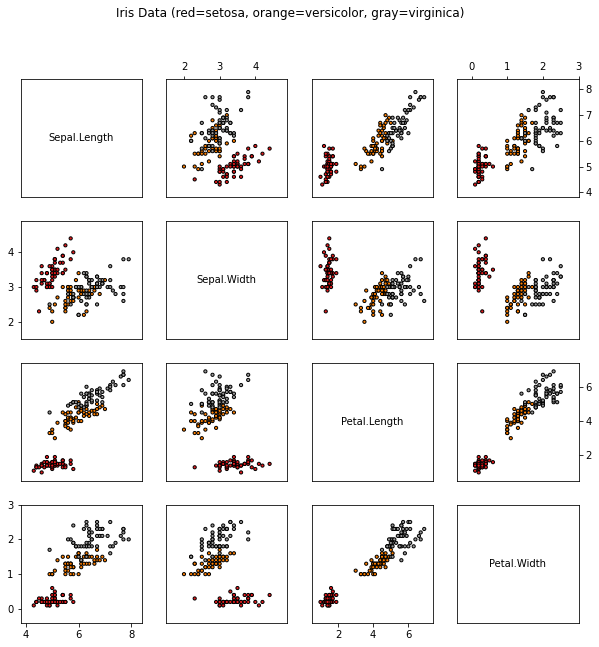

In [4]:
# plot the figure
plt.figure(1, figsize=(10, 10))
for i in range(0, 4):
    for j in range(0, 4):
        if(i != j):
            x_min, x_max = X[:, j].min() - .5, X[:, j].max() + .5
            y_min, y_max = X[:, i].min() - .5, X[:, i].max() + .5

            ax = plt.subplot(4, 4, i*4+j+1)

            plt.scatter(X[:, j], X[:, i], c=y, cmap=plt.cm.Set1,
                        edgecolor='k', s=10)
            plt.xlim(x_min, x_max)
            plt.ylim(y_min, y_max)

            # set ticks
            if((j==1) & (i==0)):
                ax.xaxis.tick_top()
                plt.yticks(())
            elif((j==0) & (i==3)):
                plt.xticks()
                plt.yticks()
            elif((i==1) & (j==0)):
                plt.xticks(())
                plt.yticks()
            elif((i==0) & (j==3)):
                ax.xaxis.tick_top()
                ax.yaxis.tick_right()
            elif((i==3) & (j==2)):
                plt.xticks()
                plt.yticks(())
            elif ((i==2) & (j==3)):
                plt.xticks(())
                ax.yaxis.tick_right()
            else:
                plt.xticks(())
                plt.yticks(())

        else:
            ax = plt.subplot(4, 4, i * 4 + j + 1)
            plt.plot(0,0)
            plt.xticks(())
            plt.yticks(())
            if(i==0):
                plt.text(0, 0, 'Sepal.Length', verticalalignment='center', horizontalalignment='center')
            elif(i==1):
                plt.text(0, 0, 'Sepal.Width', verticalalignment='center', horizontalalignment='center')
            elif(i==2):
                plt.text(0, 0, 'Petal.Length', verticalalignment='center', horizontalalignment='center')
            elif(i==3):
                plt.text(0, 0, 'Petal.Width', verticalalignment='center', horizontalalignment='center')



plt.suptitle('Iris Data (red=setosa, orange=versicolor, gray=virginica)')

## 下面是LinearRegression

Linear Regression Function: y=2.230x+1.084
model score: 0.9271098389904927
mse: 0.2256316877786924


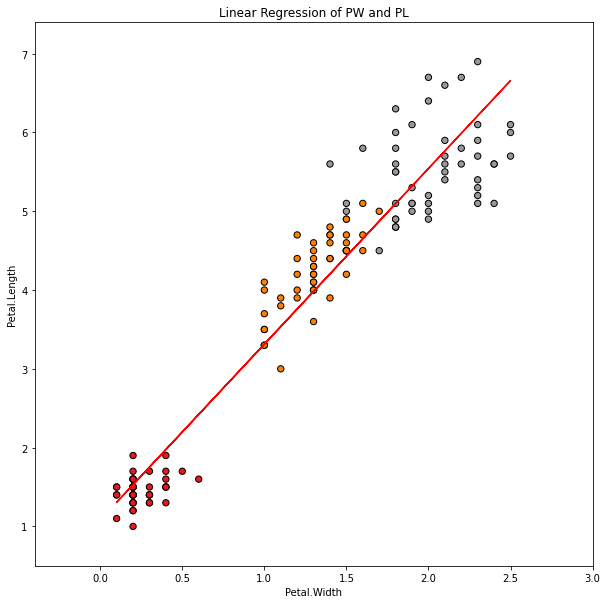

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# petal.width, petal.length
model = LinearRegression()
PW = X[:, 3].reshape(-1, 1)
PL = X[:, 2].reshape(-1, 1)
model.fit(PW, PL)
score = model.score(PW, PL)
mse = mean_squared_error(PL, model.predict(PW))

plt.figure(2, figsize=(10, 10))
x_min, x_max = X[:, 3].min() - .5, X[:, 3].max() + .5
y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5
plt.scatter(X[:, 3], X[:, 2], c=y, cmap=plt.cm.Set1,edgecolor='k', s=40)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Petal.Width')
plt.ylabel('Petal.Length')
plt.plot(PW, model.predict(PW), 'r-')
plt.title('Linear Regression of PW and PL')

k = model.coef_
b = model.intercept_
print('Linear Regression Function: y=%.3fx+%.3f'%(k[0][0], b[0]))

print('model score:', score)
print('mse:', mse)



Linear Regression Function: y=-0.223x+6.526
model score: 0.013822654141080859
mse: 0.6717073053166401


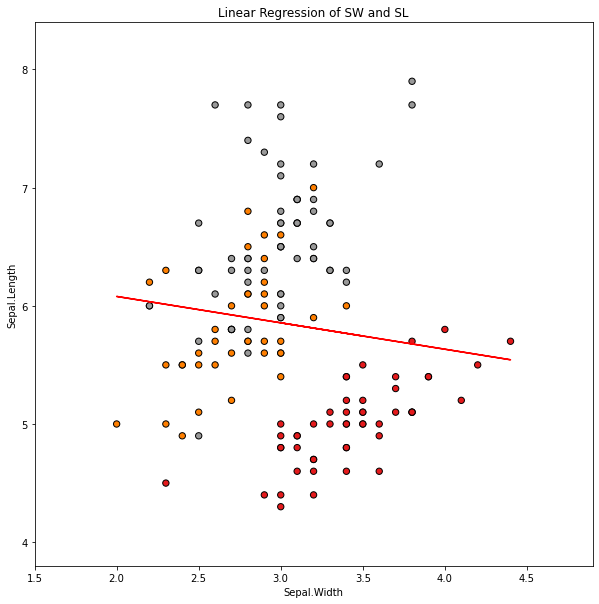

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# sepal.width, sepal.length
model = LinearRegression()
SW = X[:, 1].reshape(-1, 1)
SL = X[:, 0].reshape(-1, 1)
model.fit(SW, SL)
score = model.score(SW, SL)
mse = mean_squared_error(SL, model.predict(SW))

plt.figure(3, figsize=(10, 10))
x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5
y_min, y_max = X[:, 0].min() - .5, X[:, 0].max() + .5
plt.scatter(X[:, 1], X[:, 0], c=y, cmap=plt.cm.Set1,edgecolor='k', s=40)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Sepal.Width')
plt.ylabel('Sepal.Length')
plt.plot(SW, model.predict(SW), 'r-')
plt.title('Linear Regression of SW and SL')

k = model.coef_
b = model.intercept_
print('Linear Regression Function: y=%.3fx+%.3f'%(k[0][0], b[0]))

print('model score:', score)
print('mse:', mse)


结论：从每个模型拟合的评分（决定系数R^2）以及均方根误差来看，或者从图像中直观看出，明显是petal.width, petal.length这一组的线性回归效果更好。

## 下面是LogisticRegression


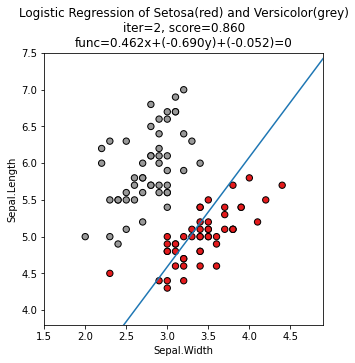

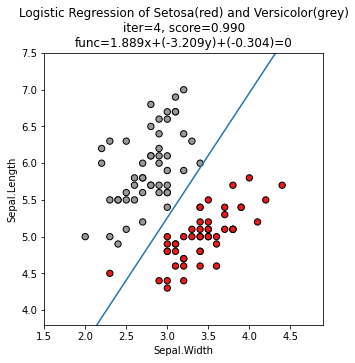

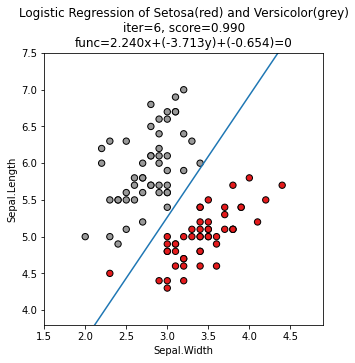

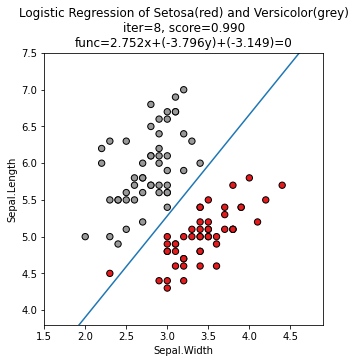

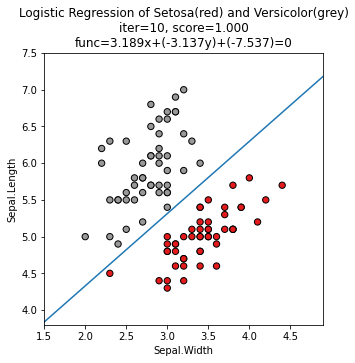

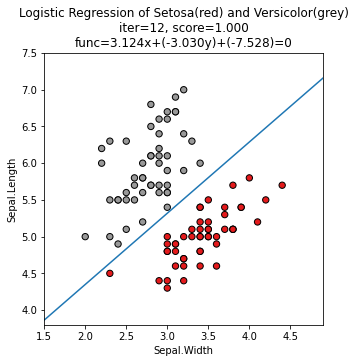

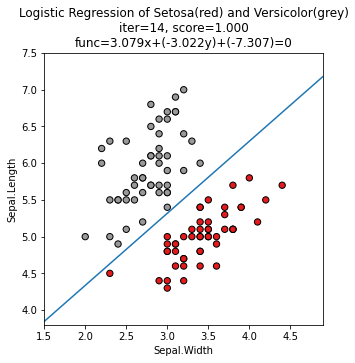

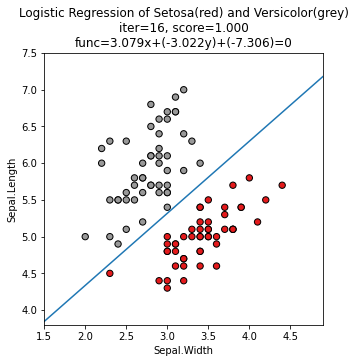

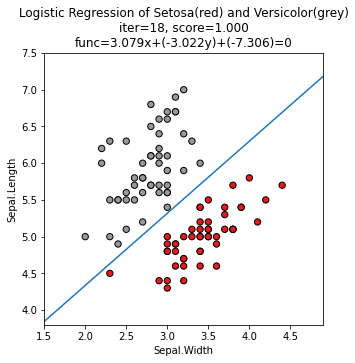

In [34]:
from sklearn.linear_model import LogisticRegression
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Setosa and Versicolor, linearly separable
X1 = X[0:100, 0:2]
y1 = y[0:100]

for i in range(1, 10):

    model = LogisticRegression(max_iter = 2*i)
    model.fit(X1, y1)
    score = model.score(X1, y1)
    # print('model score:', score)

    y1_pred = model.predict(X1)
    # print('matchs: {0}/{1}'.format(np.equal(y1_pred, y1).tolist().count(True), y1.shape[0]))

    k1 = model.coef_
    b1 = model.intercept_
    # print('Logistic Regression Line Function: %.3fx+(%.3fy)+(%.3f)=0'%(k1[0][0], k1[0][1], b1[0]))

    plt.figure(figsize=(5, 5))
    x_min, x_max = X1[:, 1].min() - .5, X1[:, 1].max() + .5
    y_min, y_max = X1[:, 0].min() - .5, X1[:, 0].max() + .5
    plt.scatter(X1[:, 1], X1[:, 0], c=y1, cmap=plt.cm.Set1,edgecolor='k', s=40)

    # draw the regression result line
    plt.plot([x_min, x_max],[-k1[0][1]/k1[0][0]*x_min-b1/k1[0][0], -k1[0][1]/k1[0][0]*x_max-b1/k1[0][0]])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('Sepal.Width')
    plt.ylabel('Sepal.Length')
    plt.title('Logistic Regression of Setosa(red) and Versicolor(grey)\niter=%d, score=%.3f\nfunc=%.3fx+(%.3fy)+(%.3f)=0'%(2*i, score, k1[0][0], k1[0][1], b1[0]))


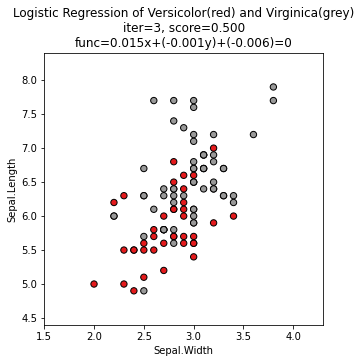

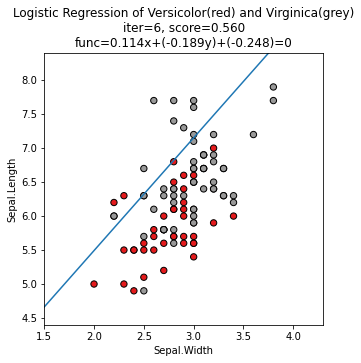

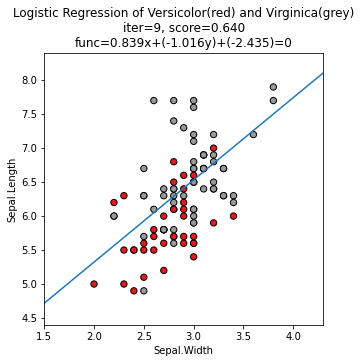

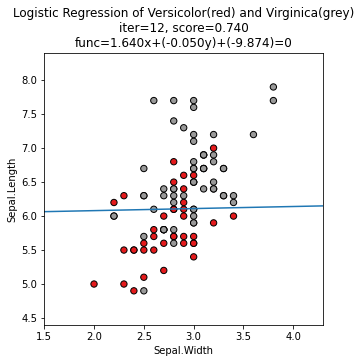

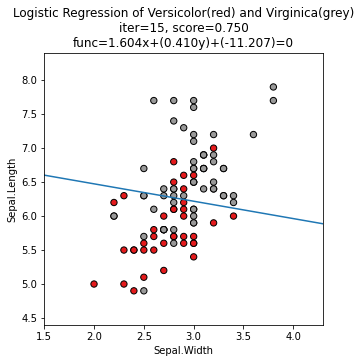

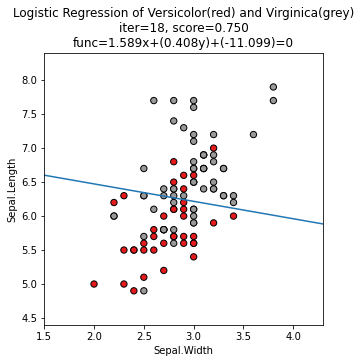

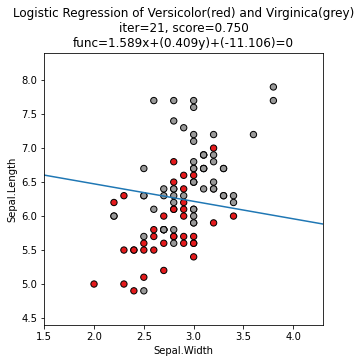

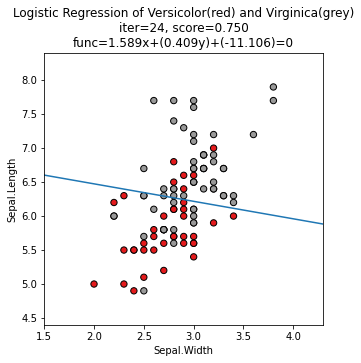

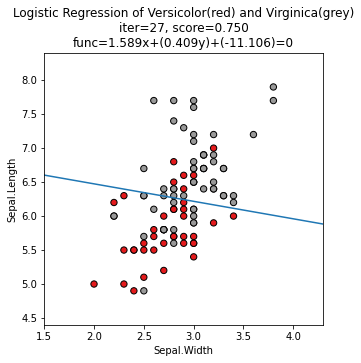

In [35]:
from sklearn.linear_model import LogisticRegression
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Versicolor and Virginica, linearly inseparable
X2 = X[50:150, 0:2]
y2 = y[50:150]

for i in range(1, 10):

    model = LogisticRegression(max_iter = 3*i)
    model.fit(X2, y2)
    score = model.score(X2, y2)

    # print('model score:', score)

    y2_pred = model.predict(X2)
    # print('matchs: {0}/{1}'.format(np.equal(y2_pred, y2).tolist().count(True), y2.shape[0]))


    k2 = model.coef_
    b2 = model.intercept_
    # print('Logistic Regression Line Function: %.3fx+(%.3fy)+(%.3f)=0'%(k2[0][0], k2[0][1], b2[0]))

    plt.figure(figsize=(5, 5))
    x_min, x_max = X2[:, 1].min() - .5, X2[:, 1].max() + .5
    y_min, y_max = X2[:, 0].min() - .5, X2[:, 0].max() + .5
    plt.scatter(X2[:, 1], X2[:, 0], c=y2, cmap=plt.cm.Set1,edgecolor='k', s=40)

    # draw the regression result line
    plt.plot([x_min, x_max],[-k2[0][1]/k2[0][0]*x_min-b2/k2[0][0], -k2[0][1]/k2[0][0]*x_max-b2/k2[0][0]])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('Sepal.Width')
    plt.ylabel('Sepal.Length')
    plt.title('Logistic Regression of Versicolor(red) and Virginica(grey)\niter=%d, score=%.3f\nfunc=%.3fx+(%.3fy)+(%.3f)=0'%(3*i, score, k2[0][0], k2[0][1], b2[0]))


结论：线性可分与线性不可分表现得十分明显，在每个迭代过程中给出了当前迭代次数iter，分类效果score和此时的分类器方程func；
对Setosa and Versicolor, linearly separable，（大致）迭代到10次就完成线性分割，迭代到16次稳定，最终score=1；
对Versicolor and Virginica, linearly inseparable，迭代到21次稳定，最终score=0.75。
